#Implementing and analysing different machine learning algorithms to check for the behaviour of these algorithms on the dataset.

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import IPython.display as ipd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
import io

# Dataset Exploration
Music conoeisseurs have been trying for a long time to understand sound and what differenciates one song from another. How to visualize sound? What makes a tone different from another?

In the following lines we will go through an in depth analysis of sound and how we can classify and ultimately understand it.



In [72]:
data = pd.read_csv('https://raw.githubusercontent.com/dwipddalal/Analysing_Mulitple_different_ML_algo/main/Data_of_Music.csv')
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333303,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308785,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [73]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,1.628790e+06,0.102578,0.002620,-0.000365,1.259757e-02,-0.000396,5.601553e-03,124.887709,-145.424643,2808.904199,100.988234,588.795354,-9.995014,374.137619,37.243725,183.911272,-2.009099,143.817714,15.395436,107.784375,-5.823034,98.505164,10.766659,74.795022,-7.569825,74.309310,8.283669,68.803998,-6.504168,63.812684,4.936315,57.790413,-5.186272,57.130389,2.164629,54.069345,-4.175271,52.678281,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,1.489398e+06,0.045651,0.003614,0.001699,1.263324e-02,0.001108,6.653225e-03,32.911676,106.456350,2596.256821,34.673178,459.705227,23.972522,294.470578,17.804460,133.164251,13.568717,109.272584,12.652512,75.900398,11.088698,65.536682,11.123007,45.881275,9.368422,44.733012,8.841558,41.864203,7.821168,40.218357,7.563187,37.481013,7.132049,35.746539,6.084283,37.715592,5.929457,37.251966,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.380000e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,1.145102e+03,0.013525,0.000005,-0.026672,9.310000e-23,-0.008794,4.670000e-08,24.377211,-662.171631,25.190538,-12.053392,9.665931,-104.249832,2.055229,-35.138493,3.540373,-47.886780,9.754141,-34.889263,5.267811,-45.187019,7.561506,-40.323467,6.899100,-39.451752,8.252314,-32.833546,7.584913,-40.008194,4.998892,-23.759195,2.345633,-29.350500,7.806118,-23.390091,3.230073,-30.467087,1.481917,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455789,4.876553e+04,3378.311110,5.595514e+05,0.067290,0.000628,-0.000127,4.086402e-03,-0.000579,1.106077e-03,103.359375,-201.474651,1143.226684,76.043871,270.420326,-26.884581,174.570416,24.450934,88.392767,-11.881086,67.975819,5.759286,53.944843,-14.464527,51.585960,2.528776,42.255037,-14.569940,42.856218,1.734222,40.205816,-12.203228,37.617884,-0.433691,34.455327,-10.352716,34.844897,-1.860355,32.415298,-8.184258,31.237773,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,1.160080e+06,0.097868,0.001390,-0.000013,8.429786e-03

In [74]:
data.shape

(9990, 59)

##visualization of this dataset:

1. #### Correlation heatmap for all the mean variables [Columns based on Mean]:



                         chroma_stft_mean  rms_mean  ...  mfcc19_mean  mfcc20_mean
chroma_stft_mean                 1.000000  0.424706  ...    -0.062985     0.193666
rms_mean                         0.424706  1.000000  ...     0.024552     0.082251
spectral_centroid_mean           0.534670  0.470781  ...     0.018651     0.191512
spectral_bandwidth_mean          0.464617  0.495142  ...     0.074453     0.133895
rolloff_mean                     0.526881  0.500178  ...     0.033071     0.182626
zero_crossing_rate_mean          0.457080  0.293745  ...    -0.058103     0.211582
harmony_mean                     0.034305  0.065134  ...     0.038825    -0.036651
perceptr_mean                   -0.109303 -0.012401  ...     0.073268    -0.075263
mfcc1_mean                       0.573974  0.795000  ...    -0.106033     0.131098
mfcc2_mean                      -0.513978 -0.453606  ...    -0.017996    -0.173734
mfcc3_mean                       0.013981  0.136936  ...     0.160484    -0.057273
mfcc

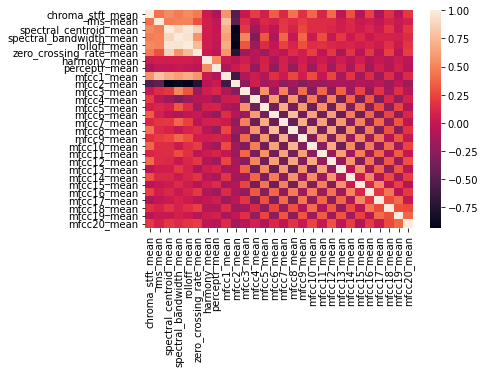

                         chroma_stft_mean  rms_mean  ...  mfcc19_mean  mfcc20_mean
chroma_stft_mean                 1.000000  0.424706  ...     0.062985     0.193666
rms_mean                         0.424706  1.000000  ...     0.024552     0.082251
spectral_centroid_mean           0.534670  0.470781  ...     0.018651     0.191512
spectral_bandwidth_mean          0.464617  0.495142  ...     0.074453     0.133895
rolloff_mean                     0.526881  0.500178  ...     0.033071     0.182626
zero_crossing_rate_mean          0.457080  0.293745  ...     0.058103     0.211582
harmony_mean                     0.034305  0.065134  ...     0.038825     0.036651
perceptr_mean                    0.109303  0.012401  ...     0.073268     0.075263
mfcc1_mean                       0.573974  0.795000  ...     0.106033     0.131098
mfcc2_mean                       0.513978  0.453606  ...     0.017996     0.173734
mfcc3_mean                       0.013981  0.136936  ...     0.160484     0.057273
mfcc

In [75]:
data.columns
cols = []
for col in data.columns:
  if 'mean' in col:
    cols.append(col)
corr = data[cols].corr() #corr() is used to find the pairwise correlation of all columns in the dataframe. Any none values are automatically excluded.
print(corr) # is correation matrix
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
g = corr.abs()
print(g)

In [76]:
def value_seperator(a):
  if 0.6<a and a<=1:
    b = '2:lot of correlation'
  elif 0.2<a and a<=0.6:
    b = '1:moderate correlation'
  elif -0.2<a and a<=0.2:
    b = '0:no correlation'
  elif -0.6<a and a<=-0.2:
    b = '-1:moderately_neg'
  else:
    b = '-2:opp. correlation'
  return b

In [77]:
corr.applymap(lambda x: value_seperator(x)) 

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
chroma_stft_mean,2:lot of correlation,1:moderate correlation,1:moderate correlation,1:moderate correlation,1:moderate correlation,1:moderate correlation,0:no correlation,0:no correlation,1:moderate correlation,-1:moderately_neg,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation
rms_mean,1:moderate correlation,2:lot of correlation,1:moderate correlation,1:moderate correlation,1:moderate correlation,1:moderate correlation,0:no correlation,0:no correlation,2:lot of correlation,-1:moderately_neg,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,1:moderate correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation
spectral_centroid_mean,1:moderate correlation,1:moderate correlation,2:lot of correlation,2:lot of correlation,2:lot of correlation,2:lot of correlation,0:no correlation,0:no correlation,2:lot of correlation,-2:opp. correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,1:moderate correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation
spectral_bandwidth_mean,1:moderate correlation,1:moderate correlation,2:lot of correlation,2:lot of correlation,2:lot of correlation,1:moderate correlation,0:no correlation,0:no correlation,2:lot of correlation,-2:opp. correlation,1:moderate correlation,-1:moderately_neg,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation
rolloff_mean,1:moderate correlation,1:moderate correlation,2:lot of correlation,2:lot of correlation,2:lot of correlation,2:lot of correlation,0:no correlation,0:no correlation,2:lot of correlation,-2:opp. correlation,1:moderate correlation,0:no correlation,0:no correlation,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation
zero_crossing_rate_mean,1:moderate correlation,1:moderate correlation,2:lot of correlation,1:moderate correlation,2:lot of correlation,2:lot of correlation,0:no correlation,0:no correlation,1:moderate correlation,-2:opp. correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,1:moderate correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,1:moderate correlation,0:no correlation,1:moderate correlation
harmony_mean,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,2:lot of correlation,1:moderate correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no correlation,0:no c

#Lets change this (N,M) matrix to a more readable (N*M, 1) matrix. I have also sorted the new matrix formed.

In [78]:
# first we have to convert the matrix to one-dimensional series. The unstack() function is used to do so. The series will have multiple index.
# For sorting sort_values() function is used. The sort_values() function sorts a data frame in Ascending or Descending order of passed Column. 
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)) # k = 1 for upper triu
unique_corr_pairs = upper_corr_mat.unstack().dropna() # to drop null values which is essentially lower matrix
sorted_mat = unique_corr_pairs.sort_values()
print(type(sorted_mat)) #One-dimensional ndarray with axis labels
#print(sorted_mat[0])
N_Mcolumn = sorted_mat.to_frame()


<class 'pandas.core.series.Series'>


In [79]:
sorted_mat

mfcc2_mean               spectral_centroid_mean    -0.931435
                         rolloff_mean              -0.923652
                         spectral_bandwidth_mean   -0.887156
                         zero_crossing_rate_mean   -0.739485
                         mfcc1_mean                -0.612310
                                                      ...   
mfcc1_mean               rms_mean                   0.795000
zero_crossing_rate_mean  spectral_centroid_mean     0.865487
spectral_bandwidth_mean  spectral_centroid_mean     0.890382
rolloff_mean             spectral_bandwidth_mean    0.951000
                         spectral_centroid_mean     0.974360
Length: 378, dtype: float64

2. #### Countplot for the labels column

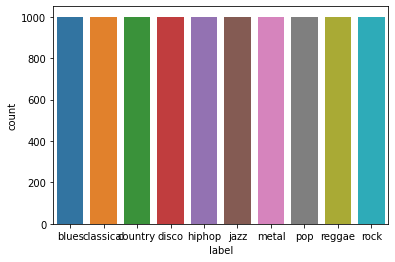

In [80]:
sns.countplot(x = 'label', data = data)

### Boxplot for the tempo vs labels column to see number of outliers it may have

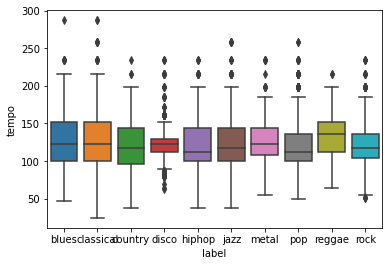

In [81]:
#data[["label", "tempo"]]
sns.boxplot(y = 'tempo', x= 'label', data = data)
#data.columns

In [82]:
j = data['zero_crossing_rate_var']
print(type(j))
mean = np.mean(j)
sd= np.std(j)
k = 0 
for i in j:
  z = (i-mean)/sd
  if np.abs(z)>3:
    k = k+1
print('zero_crossing_rate_var=',k)

<class 'pandas.core.series.Series'>
zero_crossing_rate_var= 217


In [83]:
j = data['harmony_mean']
mean = np.mean(j)
sd= np.std(j)
k = 0 
for i in j:
  z = (i-mean)/sd 
  if np.abs(z)>3:
    k = k+1
print('harmony_mean=',k)

harmony_mean= 116


In [84]:
j = data['rms_var']
mean = np.mean(j)
sd= np.std(j)
k = 0 
for i in j:
  z = (i-mean)/sd
  if np.abs(z)>3:
    k = k+1
print('rms_var=',k)

rms_var= 270


In [85]:
j = data['perceptr_mean']
mean = np.mean(j)
sd= np.std(j)
k = 0 
for i in j:
  z = (i-mean)/sd
  if np.abs(z)>3:
    k = k+1
print('perceptr_mean=',k)

perceptr_mean= 270


### Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [87]:
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333303,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308785,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### Preprocess the data.


In [88]:
Q1 = data.quantile(0.25)
print(Q1)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1 # interquatile range.
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("SHAPE:",data.shape)  
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] 
cols = X.columns # contains name of all the columns 
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

length                      66149.000000
chroma_stft_mean                0.315698
chroma_stft_var                 0.079833
rms_mean                        0.083782
rms_var                         0.000615
spectral_centroid_mean       1630.680158
spectral_centroid_var      123196.130775
spectral_bandwidth_mean      1887.455789
spectral_bandwidth_var      48765.526957
rolloff_mean                 3378.311110
rolloff_var                559551.376075
zero_crossing_rate_mean         0.067290
zero_crossing_rate_var          0.000628
harmony_mean                   -0.000127
harmony_var                     0.004086
perceptr_mean                  -0.000579
perceptr_var                    0.001106
tempo                         103.359375
mfcc1_mean                   -201.474651
mfcc1_var                    1143.226684
mfcc2_mean                     76.043871
mfcc2_var                     270.420326
mfcc3_mean                    -26.884581
mfcc3_var                     174.570416
mfcc4_mean      

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y,test_size=0.1, random_state=42)

### The Predefined function to assess the accuracy of a model.

In [90]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

### Let's see how a basic Logistic Regressor works on this!

In [91]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

[[28  0  5  0  0  1  2  0  1  0]
 [ 0 18  1  0  0  0  0  0  0  0]
 [ 6  0 40  3  2  1  0  0  2  3]
 [ 2  0  2 37  2  0  6  0  0  2]
 [ 1  0  0  1 24  0  0  0  1  1]
 [ 1  1  3  0  0 25  0  0  0  0]
 [ 1  0  0  0  0  1 34  0  0  4]
 [ 0  0  3  1  0  0  0 14  0  1]
 [ 0  0  6  1  0  0  0  2 10  2]
 [ 2  0  1  7  1  2  0  2  1 27]]
Accuracy for Logistic Regression : 0.74493 



The accuracy hovers around 74%. 


### Next I shall run the **AdaBoostClassifier** with n_estimators=1000 & random_state=0 and **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

In [110]:
# AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=300, random_state=0)
score(ada_clf, title = 'Ada' )

[[ 9  1  2  5  0  2  2  0  0 16]
 [ 1 15  1  0  0  2  0  0  0  0]
 [ 4  3 11 19  0  4  2  0  0 14]
 [ 1  0  1 26  0  0  6  0  0 17]
 [ 0  0  0  2  2  0  5  1  2 16]
 [ 2  8  1  0  0 10  7  0  0  2]
 [ 3  0  1  2  0  0 23  0  0 11]
 [ 0  0  0 10  0  1  1  7  0  0]
 [ 1  0  4  7  0  1  1  0  1  6]
 [ 1  2  5  8  0  1  7  3  0 16]]
Accuracy for Ada : 0.34783 



In [93]:
# Random Forest
rn = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
score(rn, title = 'Rn' )

[[28  0  6  1  0  1  1  0  0  0]
 [ 0 18  1  0  0  0  0  0  0  0]
 [ 2  0 51  2  0  1  0  0  0  1]
 [ 0  0  4 45  1  0  0  0  0  1]
 [ 0  0  0  1 26  0  0  0  0  1]
 [ 0  1  3  0  0 26  0  0  0  0]
 [ 0  0  1  0  1  1 37  0  0  0]
 [ 0  1  1  2  0  0  0 14  0  1]
 [ 0  0  2  2  0  1  0  0 16  0]
 [ 0  0  3  7  0  2  1  0  0 30]]
Accuracy for Rn : 0.84348 



AdaBoost performs poorly, but Random Forest looks great!

In [104]:
# Naive Bayes: GaussianNB
NBG = GaussianNB()
score(NBG, 'NBG')


KNN = KNeighborsClassifier(n_neighbors=100)
score(KNN,'KNN')

# Decission trees: DecisionTreeClassifier
dt = DecisionTreeClassifier()
score(dt,'dt')


[[17  0  4  1  2  2 10  0  1  0]
 [ 0 18  0  0  0  0  0  0  1  0]
 [ 6  0 27  2  2  5  3  5  4  3]
 [ 3  0  4  6  4  0 13 10  6  5]
 [ 0  0  0  1 17  0  5  2  3  0]
 [ 1  2  2  0  0 21  0  3  0  1]
 [ 1  0  0  0  2  1 34  0  0  2]
 [ 0  1  1  0  0  0  0 16  0  1]
 [ 1  0  1  1  0  0  0  3 15  0]
 [ 3  2  1  1  1  4 13  5  3 10]]
Accuracy for NBG : 0.52464 

[[19  1  9  1  0  1  3  0  0  3]
 [ 0 18  1  0  0  0  0  0  0  0]
 [ 1  1 47  6  0  1  0  0  0  1]
 [ 0  0  4 39  0  0  3  0  2  3]
 [ 2  0  0  3 18  0  0  0  4  1]
 [ 0  2  4  2  0 20  0  0  0  2]
 [ 1  0  0  3  0  0 32  0  0  4]
 [ 0  1  1  6  0  0  0 10  0  1]
 [ 0  0  5  4  0  1  0  0 10  1]
 [ 0  2  5  9  0  1  2  0  2 22]]
Accuracy for KNN : 0.68116 

[[22  0  6  1  0  2  3  0  0  3]
 [ 0 16  2  0  0  0  0  0  0  1]
 [ 8  0 30  3  1  2  4  1  2  6]
 [ 0  0  4 34  2  2  3  0  2  4]
 [ 0  0  0  2 23  0  2  0  0  1]
 [ 2  3  2  0  1 17  0  2  1  2]
 [ 3  0  1  0  0  1 31  0  0  4]
 [ 0  1  1  3  1  0  0 12  0  1]
 [ 1  1  4  1  0

## Next let's try **XGBClassifier** with n_estimators=1000 and learning_rate=0.05

In [95]:
# XGBClassifier
xg = XGBClassifier(n_estimators=1000, learning_rate=0.05, random_state = 0)
score(xg,'xg')

[[32  0  3  1  0  1  0  0  0  0]
 [ 0 17  2  0  0  0  0  0  0  0]
 [ 1  0 48  2  0  2  0  1  1  2]
 [ 0  0  2 48  1  0  0  0  0  0]
 [ 0  0  1  0 26  0  0  0  0  1]
 [ 1  0  3  0  0 26  0  0  0  0]
 [ 1  0  0  0  0  1 37  0  0  1]
 [ 0  1  1  2  0  0  0 15  0  0]
 [ 0  0  2  1  1  0  0  1 16  0]
 [ 0  0  0  3  0  0  2  0  1 37]]
Accuracy for xg : 0.87536 



In [96]:
#classification matrix
xg = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xg.fit(X_train, y_train)
preds = xg.predict(X_test)
print(sklearn.metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

       blues       0.91      0.86      0.89        37
   classical       0.94      0.89      0.92        19
     country       0.77      0.84      0.81        57
       disco       0.84      0.94      0.89        51
      hiphop       0.93      0.93      0.93        28
        jazz       0.87      0.87      0.87        30
       metal       0.95      0.93      0.94        40
         pop       0.88      0.79      0.83        19
      reggae       0.89      0.76      0.82        21
        rock       0.90      0.86      0.88        43

    accuracy                           0.88       345
   macro avg       0.89      0.87      0.88       345
weighted avg       0.88      0.88      0.88       345



**XGBRFClassifier** on your own.

In [97]:
# XGBRFClassifier
xgbrf = XGBRFClassifier(n_estimators=1000, learning_rate=0.05)
xgbrf.fit(X_train, y_train)
preds = xgbrf.predict(X_test)
print(sklearn.metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

       blues       0.72      0.35      0.47        37
   classical       0.84      0.84      0.84        19
     country       0.50      0.77      0.61        57
       disco       0.52      0.65      0.58        51
      hiphop       0.83      0.89      0.86        28
        jazz       0.68      0.63      0.66        30
       metal       0.71      0.93      0.80        40
         pop       1.00      0.63      0.77        19
      reggae       0.77      0.48      0.59        21
        rock       0.82      0.42      0.55        43

    accuracy                           0.66       345
   macro avg       0.74      0.66      0.67       345
weighted avg       0.70      0.66      0.65       345



In [98]:
score(xgbrf,'xgbrf')

[[13  0 12  3  1  2  6  0  0  0]
 [ 0 16  2  0  0  1  0  0  0  0]
 [ 2  0 44  7  0  0  2  0  1  1]
 [ 1  0 10 33  2  0  4  0  0  1]
 [ 0  0  0  2 25  0  1  0  0  0]
 [ 0  1  6  3  0 19  0  0  0  1]
 [ 0  0  1  0  0  1 37  0  1  0]
 [ 0  1  1  5  0  0  0 12  0  0]
 [ 0  0  7  3  0  0  0  0 10  1]
 [ 2  1  5  7  2  5  2  0  1 18]]
Accuracy for xgbrf : 0.65797 



### Till now, it looks like XGBClassifier performs the best. Let's experiment with it a bit more.

Plot of the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.05

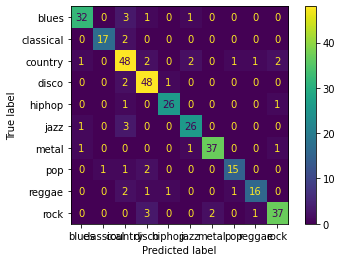

In [99]:
# Cell to plot Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xg, X_test, y_test)  
plt.show()

Since featre importance is an important aspect as it tells us about which featrue contributes more to the final outcome so let's implement it. 


In [117]:
k = xg.feature_importances_
j = k.max()
a = -1
# outputs are in percentage
for i in data.columns[:-1]:
  a = a + 1
  print(i," -> ",k[a]*100)
  if k[a] == j:
    I = i
    J = j

print("The feature with max importance is:",I, " and it's value is: " ,J*100)

length  ->  0.0
chroma_stft_mean  ->  3.279760852456093
chroma_stft_var  ->  1.4039651490747929
rms_mean  ->  1.3754142448306084
rms_var  ->  2.1542247384786606
spectral_centroid_mean  ->  3.9144549518823624
spectral_centroid_var  ->  3.002743422985077
spectral_bandwidth_mean  ->  4.028639569878578
spectral_bandwidth_var  ->  1.3236022554337978
rolloff_mean  ->  2.194717712700367
rolloff_var  ->  2.399373985826969
zero_crossing_rate_mean  ->  2.4946749210357666
zero_crossing_rate_var  ->  0.8549798280000687
harmony_mean  ->  0.6316546350717545
harmony_var  ->  2.012587897479534
perceptr_mean  ->  2.663653716444969
perceptr_var  ->  5.234070867300034
tempo  ->  1.975453458726406
mfcc1_mean  ->  3.177865222096443
mfcc1_var  ->  3.8381513208150864
mfcc2_mean  ->  2.1385638043284416
mfcc2_var  ->  0.6338177714496851
mfcc3_mean  ->  1.9167209044098854
mfcc3_var  ->  1.6585461795330048
mfcc4_mean  ->  3.7691619247198105
mfcc4_var  ->  1.7136422917246819
mfcc5_mean  ->  2.2766761481761932
mfc